In [26]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv(".\data\practive pyspark.csv")
df.drop(columns ={'flight_date','booking_date','Code'}, inplace =True)
df.head()

,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,know_chinese,income,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
0,central,female,69,middle,16,master,manager,1,1,1,33250,1,2,2,1,1,2,2,1,1
1,southern,female,50,middle,12,highshool,officer,0,0,0,6960,1,3,3,3,2,3,3,2,3
2,northern,male,73,elder,12,highshool,officer,1,0,0,11100,1,2,2,1,2,3,5,1,1
3,northern,female,73,elder,12,highshool,officer,0,0,0,11100,1,5,3,2,4,5,3,2,2
4,central,male,69,middle,16,master,officer,1,0,0,16140,0,3,3,3,3,3,3,3,3


In [28]:
#Check missing values
df.isna().sum()

area                    0
gender                  0
age                     0
age_group               0
year_of_school          0
degree                  0
job                     0
know_english            0
know_france             0
know_chinese            0
income                  0
flight_status           0
professionally_staff    0
customer_service        0
diversity_product       0
good_price              0
easily_transaction      0
goodlooking_staff       0
diversity_flighttime    0
good_construction       0
dtype: int64

# Categorical data

In [29]:
cat_col = ['area','gender','age_group','degree','job']

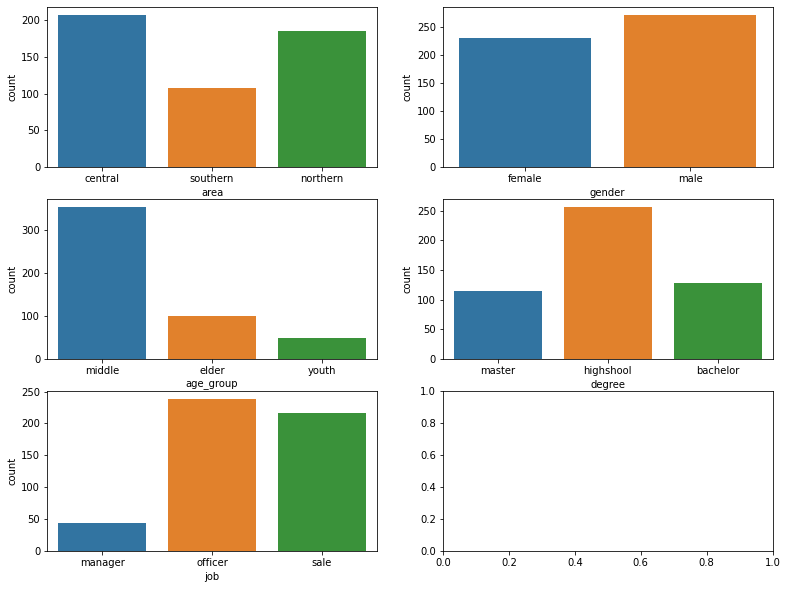

In [30]:
fig, ax = plt.subplots(3,2,figsize = (13,10))
for idx, col in enumerate(cat_col):
    x,y = idx//2, idx %2
    fig = sns.countplot(x = df[col], ax=ax [x,y])

# Numberic data

In [31]:
col_num = ['age','income','year_of_school']

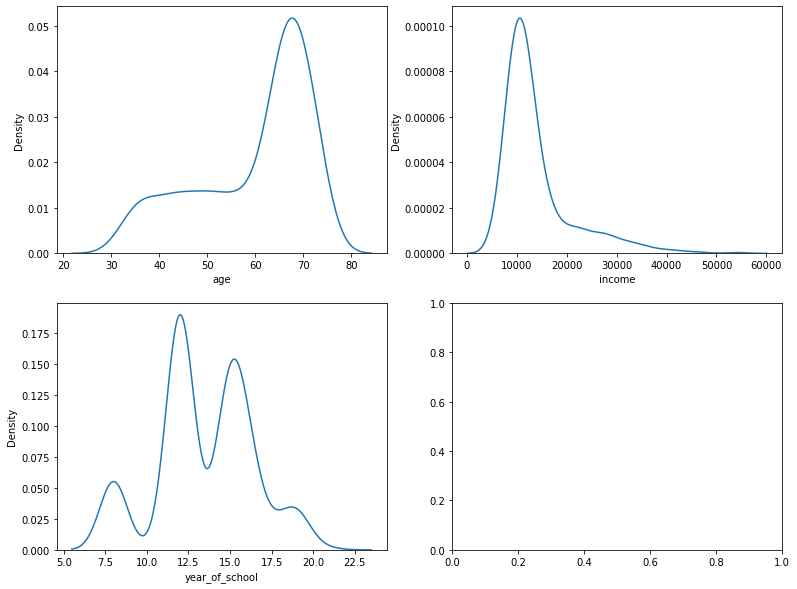

In [32]:
fig, ax = plt.subplots(2,2,figsize = (13,10))
for idx, col in enumerate(col_num):
    x,y = idx//2, idx %2
    fig = sns.kdeplot(x = df[col], ax=ax [x,y])

In [33]:
# logarit biến income
df['income'] = np.log10(df['income'] )

# Check oulier

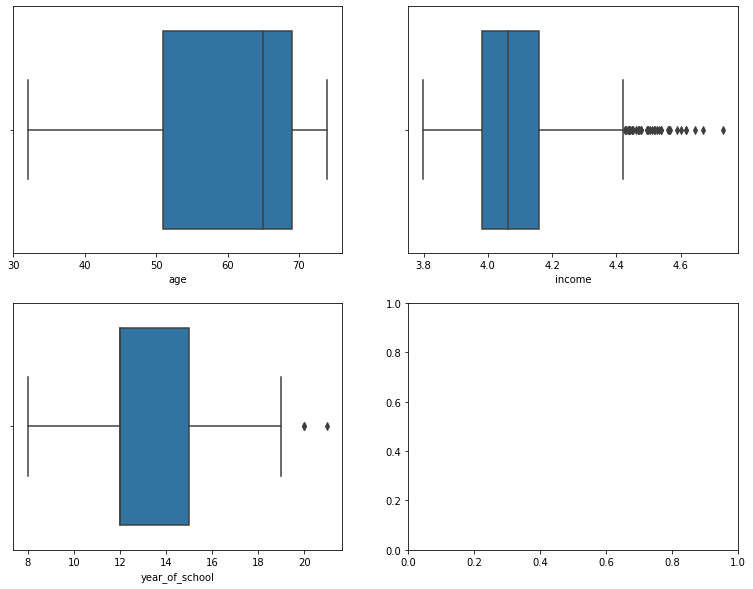

In [34]:
fig, ax = plt.subplots(2,2,figsize = (13,10))
for idx, col in enumerate(col_num):
    x,y = idx//2, idx %2
    fig = sns.boxplot(x = df[col], ax=ax [x,y])

# Xử lý oulier 

In [36]:
for col in col_num:
    for i in range(10):
        percentile25 = df[col].quantile(0.25)
        percentile75 = df[col].quantile(0.75)
        iqr = percentile75- percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        df = df[(df[col] < upper_limit) & (df[col]> lower_limit)]


In [37]:
df.shape

(424, 20)

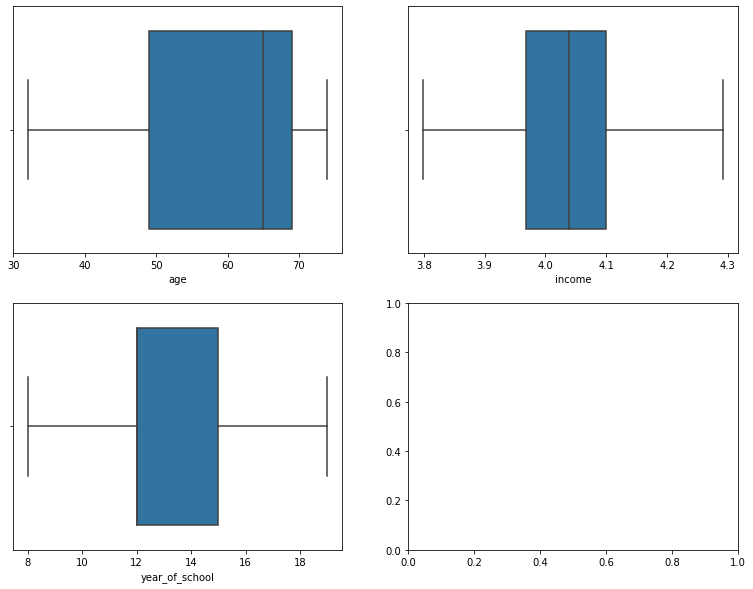

In [39]:
fig, ax = plt.subplots(2,2,figsize = (13,10))
for idx, col in enumerate(col_num):
    x,y = idx//2, idx %2
    fig = sns.boxplot(x = df[col], ax=ax [x,y])

In [40]:
X = df[['area', 'gender', 'age', 'age_group', 'year_of_school', 'degree', 'job',
       'know_english', 'know_france', 'know_chinese'
       ]]
y = df['income']

# dummies Data

In [41]:
X = pd.get_dummies(X, drop_first = True)

In [42]:
X.head()

,age,year_of_school,know_english,know_france,know_chinese,area_northern,area_southern,gender_male,age_group_middle,age_group_youth,degree_highshool,degree_master,job_officer,job_sale
1,50,12,0,0,0,0,1,0,1,0,1,0,1,0
2,73,12,1,0,0,1,0,1,0,0,1,0,1,0
3,73,12,0,0,0,1,0,0,0,0,1,0,1,0
4,69,16,1,0,0,0,0,1,1,0,0,1,1,0
5,72,12,0,0,0,1,0,0,0,0,1,0,0,1


In [43]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =4 )

In [44]:
reg = LinearRegression().fit(X_train, y_train)

In [45]:
#predict income
y_pred = reg.predict(X_test)
y_pred;

In [46]:
e = pd.DataFrame({'y_true': y_test, 'y_pridict': y_pred})
e.head()

,y_true,y_pridict
83,4.038223,4.039512
325,4.092018,4.145798
216,3.987666,4.051789
331,4.003461,4.040713
87,3.962843,3.933413


Ta có thấy model đưa ra kết quà khá là tốt với sai số nhỏ

In [47]:
print(f"Hiệu suất của mô hình R bình phương: {r2_score(y_test, y_pred)}")

Hiệu suất của mô hình R bình phương: 0.8538828604858681


 Vậy  85 % sự thay đổi của biến dependent có thể được giải thích bằng các biến independent

Mean Square error

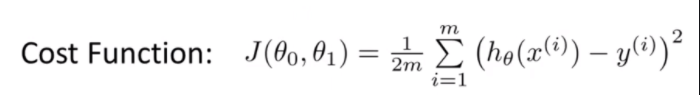

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0018840526819060618

Ta có thể thấy tổng bình phương sai số giữa giá trị quan sát và giá trị dự đoán là rất nhỏ ~ 0, các giá trị dự đoán gần khớp với giá trị mong đợi. Vậy model của ta là model tốt

In [49]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

0.09842219533065322

Model cho ra giá trị sai số tối đa là 0.098. Khá tốt!